# 0. Librerías básicas

In [3]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [4]:
def plt_imshow(title, image):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

# TAREA 

<div class="alert alert-success">
    
**Ejercicio 1**
    
 <ul>     
  <li>a) Generar imagenes como las que se muestran a continuación (300 x 300)</li>
  <li>b) Aplicar las operaciones de AND, OR y XOR</li>
   <li>b)Aplicar la operación inversa a ambas imagenes</li>     
</ul> 

</div>
<img align="left" width="500"  float= "none" align="middle" src="figuras/circulo_triangulo.png">


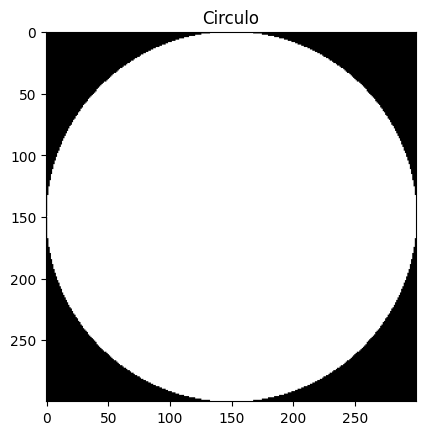

In [5]:
# Circulo
circle = np.zeros((300, 300), dtype = "uint8")
cv.circle(circle, (150, 150), 150, 255, -1)
plt_imshow("Circulo", circle)

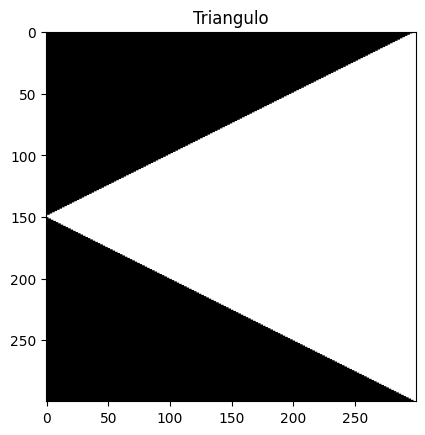

In [18]:
# Circulo
triangle = np.zeros((300, 300), dtype = "uint8")
puntos=np.array([[0,150],[300,0],[300,300]])
cv.fillPoly(triangle, pts=[puntos], color=(255, 255, 255))
plt_imshow("Triangulo", triangle)

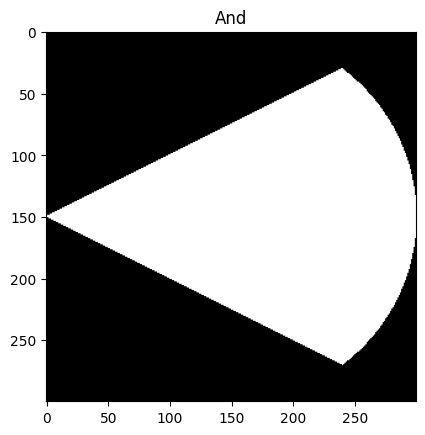

In [19]:
#AND
img_and = cv.bitwise_and(circle, triangle)
plt_imshow("And", img_and)

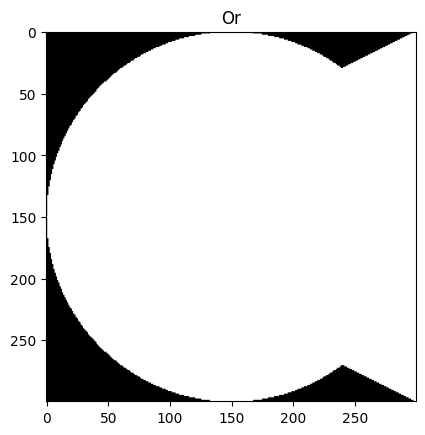

In [21]:
#OR
img_or = cv.bitwise_or(circle, triangle)
plt_imshow("Or", img_or)

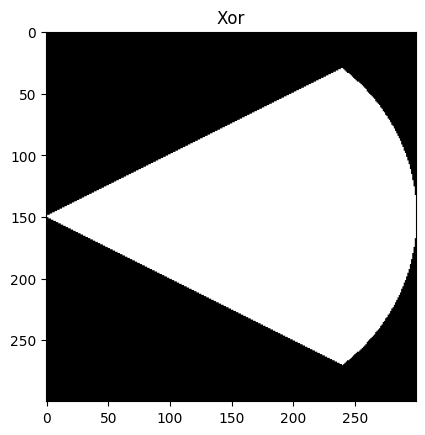

In [22]:
#XOR
img_xor = cv.bitwise_and(circle, triangle)
plt_imshow("Xor", img_xor)

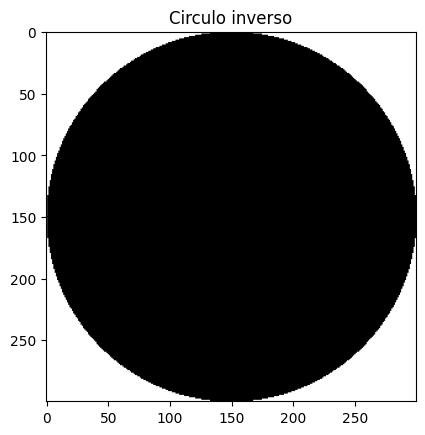

In [24]:
#Rectangulo
cir_inv = cv.bitwise_not(circle)
plt_imshow("Circulo inverso", cir_inv)

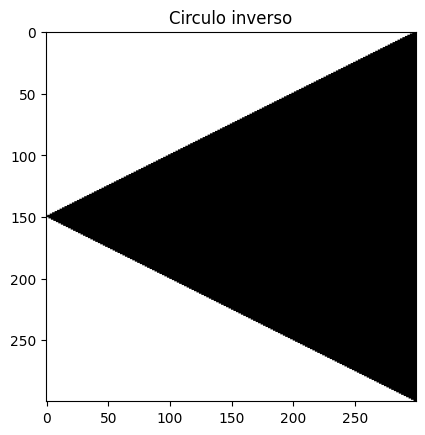

In [25]:
#Rectangulo
tri_inv = cv.bitwise_not(triangle)
plt_imshow("Circulo inverso", tri_inv)

<div class="alert alert-success">
    
**Ejercicio 2.  Descargar una imagen con el rostro de una persona**
    
   
 <ul>
  <li>a) Generar y aplicar una mascara con una circunferencia </li>
  <li>b) Generar y aplicar una mascara con un cuadrado</li>
</ul> 

</div>


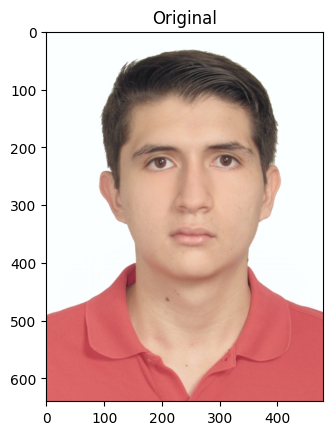

(640, 480, 3)

In [29]:
# Abrir el archivo 'figuras/me.JPG'
img = cv.imread("figuras/me.JPG")
plt_imshow("Original", img)
img.shape

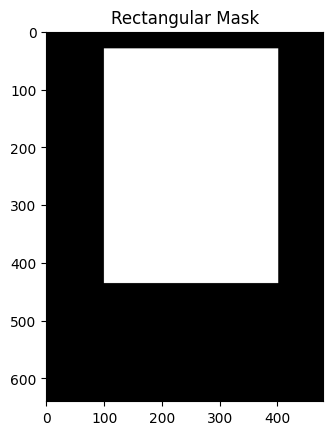

In [44]:
# Mascara rectangular
img_rec_mask = np.zeros( (640,480), dtype = 'uint8' )
cv.rectangle(img_rec_mask, (100, 30), (400, 435), 255, -1)
plt_imshow( 'Rectangular Mask',img_rec_mask)

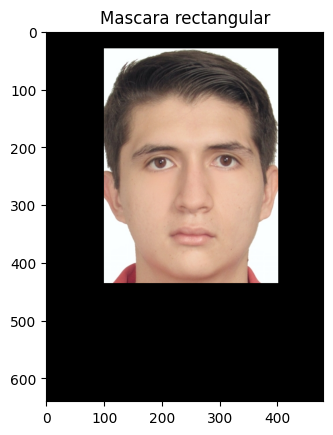

In [45]:
img_mascara_rectangular=cv.bitwise_and(img, img, mask = img_rec_mask)
plt_imshow("Mascara rectangular", img_mascara_rectangular)

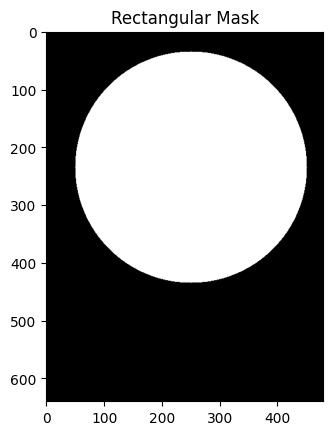

In [53]:
# Mascara circular
img_cir_mask = np.zeros( (640,480), dtype = 'uint8' )
cv.circle(img_cir_mask, (250, 235), 200,  255, -1)
plt_imshow("Rectangular Mask", img_cir_mask)

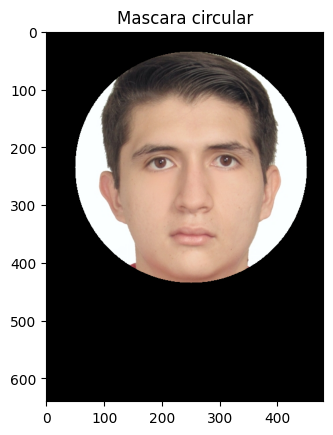

In [54]:
img_mascara_circular=cv.bitwise_and(img, img, mask = img_cir_mask)
plt_imshow("Mascara circular", img_mascara_circular)

<div class="alert alert-success">
    
**Ejercicio 3**
    
   
 <ul>
  <li>a) Utilizando el archivo "figuras/ruido.jpg", aplicar todas las operaciones posibles para tratar de limpiar las letras de la figura del ruido existente, es decir tratar de que solo se vean las letras </li>
</ul> 

</div>
<img align="left" width="500"  float= "none" align="middle" src="figuras/ruido.jpg">

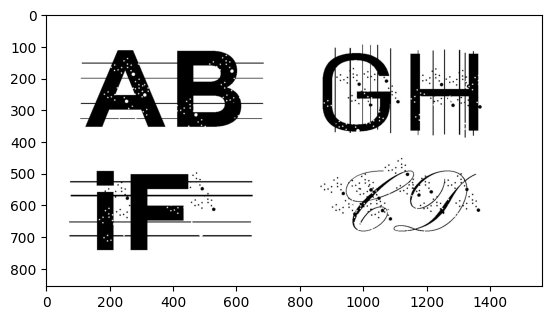

In [86]:
# Imagen figuras/ruido.jpg en escala de grises
img = cv.imread("figuras/ruido.jpg")
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gris, cmap = "gray")
plt.show()

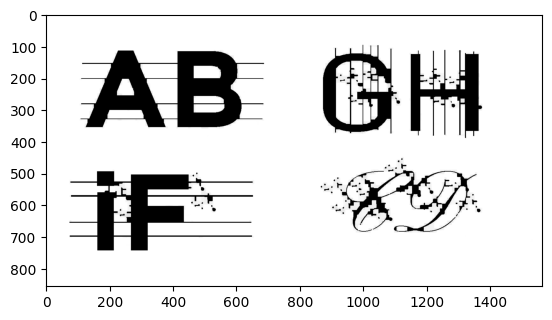

In [95]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (12, 12))
img_opening = cv.morphologyEx(img_gris, cv.MORPH_OPEN, kernel)
plt.imshow(img_opening, cmap = "gray")
plt.show()

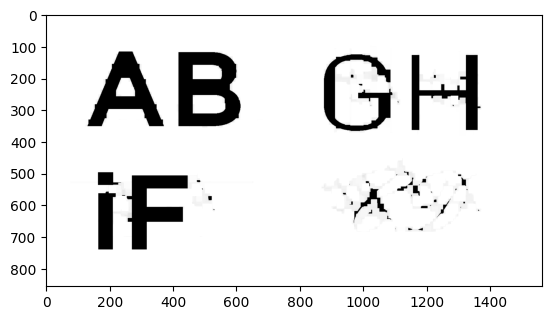

In [96]:
#Dilatación

img_dilatacion = cv.dilate(img_opening, None, iterations = 3)
plt.imshow(img_dilatacion, cmap = "gray")
plt.show()

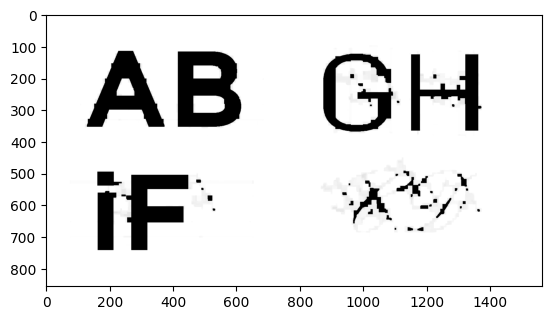

In [98]:
img_erosion = cv.erode(img_dilatacion, None, iterations = 2)
plt.imshow(img_erosion, cmap = "gray")
plt.show()

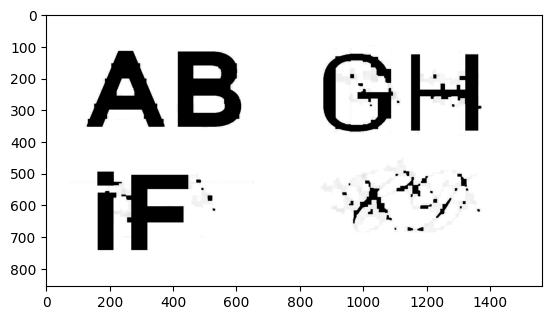

In [99]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
img_opening = cv.morphologyEx(img_erosion, cv.MORPH_OPEN, kernel)
plt.imshow(img_opening, cmap = "gray")
plt.show()

<div class="alert alert-success">
    
**Ejercicio 4**
    
   
 <ul>
  <li> Utilizar una imagen que tenga algún objeto en color azul y obtenga una nueva imagen en donde todo lo azul este a color y el resto en escala de grises   </li>
</ul> 

</div>


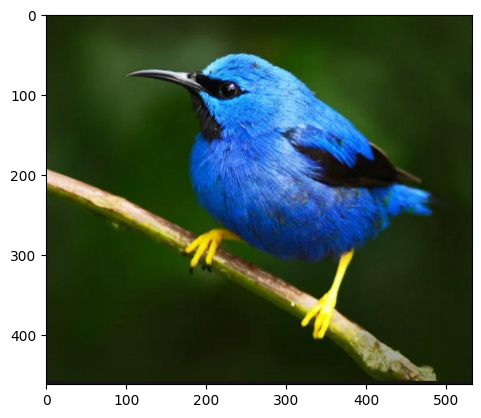

In [101]:
#Mostramos la imagen original
img = cv.imread("figuras/bluebird.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [102]:
#Llevamos a cabo el cambio de espacio de color y definimos los rangos 
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
inferior = np.array([67, 80, 70])
superior = np.array([162, 255, 255])

In [103]:
#Aplicamos la mascara de la region de color
mascara = cv.inRange(img_hsv, inferior, superior)

In [104]:
# Revisamos los valores de los pixeles
img_hsv.shape

(462, 532, 3)

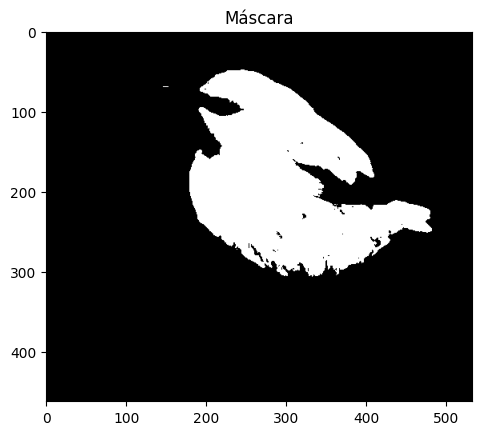

In [105]:
# Visualizamos la mascara
plt_imshow("Máscara", mascara)

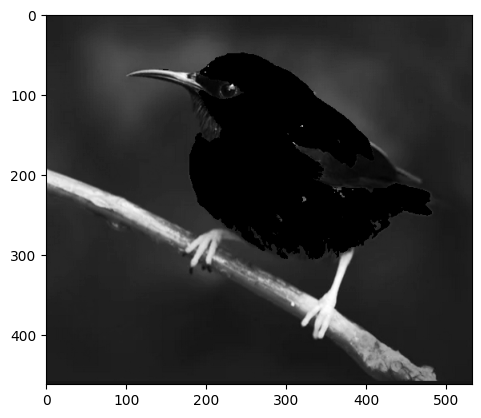

In [109]:
#Obtenemos la imagen en escala de grisis y eliminamos los valores de la mascara
img = cv.imread("figuras/bluebird.png")
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_gris_sub = cv.subtract(img_gris, mascara)
plt.imshow(img_gris_sub, cmap = "gray")
plt.show()

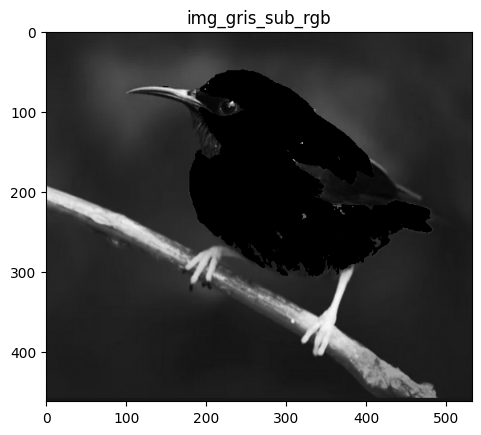

(462, 532, 3)

In [112]:
#COnvertimos la imagen resultante en RGB
img_gris_sub_rgb = cv.cvtColor(img_gris_sub, cv.COLOR_GRAY2BGR)
plt_imshow("img_gris_sub_rgb", img_gris_sub_rgb)
img_gris_sub_rgb.shape

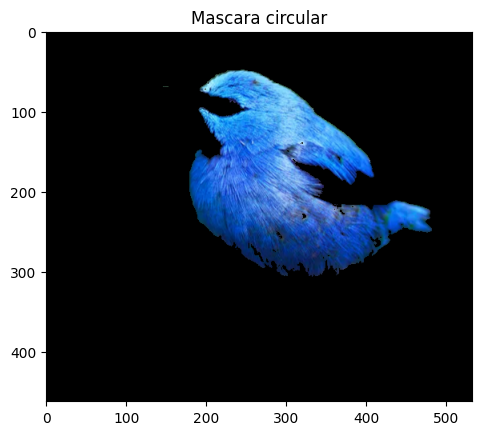

In [113]:
#Obtenemos la mascara aplicada a la imagen real
img_sub_org=cv.bitwise_and(img,img,mask=mascara)
plt_imshow("Mascara circular",img_sub_org)

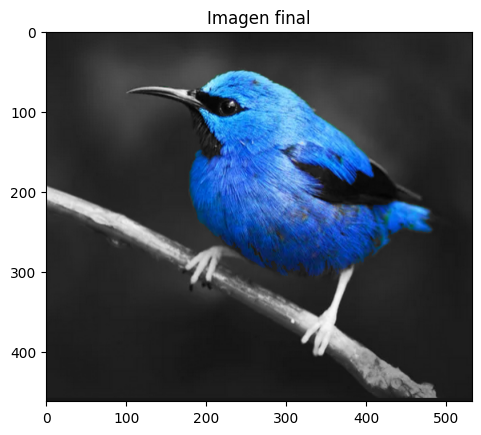

In [114]:
#Resaltando un color en una imagen  
img_add = cv.add(img_gris_sub_rgb, img_sub_org)
plt_imshow("Imagen final", img_add)